<a href="https://colab.research.google.com/github/varunkr24/Face-Detection/blob/Python/Face_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.listdir('../content/drive/My Drive/AIML/Projects/CV'))

['trainimages.npy']


In [3]:
import numpy as np
images=np.load("../content/drive/My Drive/AIML/Projects/CV/trainimages.npy",allow_pickle=True)

In [4]:
print("There are {} images in the dataset".format(len(images)))

There are 409 images in the dataset


In [5]:
img_height = 224 
img_width = 224

In [6]:
import cv2
import time
from tensorflow.keras.applications.mobilenet import preprocess_input

In [7]:
masks = np.zeros((int(images.shape[0]), img_height, img_width))
X = np.zeros((int(images.shape[0]), img_height, img_width, 3))
for index in range(images.shape[0]):
  img = images[index][0]
  img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_AREA)
  try:
    img = img[:, :, :3]
  except:
    continue
  X[index] = preprocess_input(np.array(img, dtype=np.float32))
  for i in images[index][1]:
    x1 = int(i['points'][0]['x']*img_width)
    x2 = int(i['points'][1]['x']*img_width)
    y1 = int(i['points'][0]['y']*img_height)
    y2 = int(i['points'][1]['y']*img_height)
    masks[index][y1:y2,x1:x2] = 1


In [8]:
masks.shape, X.shape

((409, 224, 224), (409, 224, 224, 3))

In [9]:
!mkdir face-detection-images

In [10]:
count = 1

totalfaces = 0

start = time.time()

for image in images:
    img = image[0]
    metadata = image[1]
    for data in metadata:
        height = data['imageHeight']
        width = data['imageWidth']
        points = data['points']
        if 'Face' in data['label']:
            x1 = round(width*points[0]['x'])
            y1 = round(height*points[0]['y'])
            x2 = round(width*points[1]['x'])
            y2 = round(height*points[1]['y'])
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
            totalfaces += 1
    cv2.imwrite('./face-detection-images/face_image_{}.jpg'.format(count),img)
    count += 1
    
end = time.time()

print("Total test images with faces : {}".format(len(images)))
print("Sucessfully tested {} images".format(count-1))
print("Execution time in seconds {}".format(end-start))
print("Total Faces Detected {}".format(totalfaces))

Total test images with faces : 409
Sucessfully tested 409 images
Execution time in seconds 8.465664148330688
Total Faces Detected 1132


In [11]:
print(os.listdir('./face-detection-images/'))

['face_image_161.jpg', 'face_image_124.jpg', 'face_image_242.jpg', 'face_image_325.jpg', 'face_image_163.jpg', 'face_image_121.jpg', 'face_image_10.jpg', 'face_image_349.jpg', 'face_image_234.jpg', 'face_image_88.jpg', 'face_image_94.jpg', 'face_image_155.jpg', 'face_image_61.jpg', 'face_image_398.jpg', 'face_image_244.jpg', 'face_image_162.jpg', 'face_image_74.jpg', 'face_image_327.jpg', 'face_image_69.jpg', 'face_image_409.jpg', 'face_image_215.jpg', 'face_image_159.jpg', 'face_image_217.jpg', 'face_image_93.jpg', 'face_image_266.jpg', 'face_image_42.jpg', 'face_image_396.jpg', 'face_image_200.jpg', 'face_image_73.jpg', 'face_image_160.jpg', 'face_image_46.jpg', 'face_image_106.jpg', 'face_image_35.jpg', 'face_image_156.jpg', 'face_image_17.jpg', 'face_image_182.jpg', 'face_image_27.jpg', 'face_image_209.jpg', 'face_image_326.jpg', 'face_image_107.jpg', 'face_image_103.jpg', 'face_image_368.jpg', 'face_image_345.jpg', 'face_image_205.jpg', 'face_image_397.jpg', 'face_image_98.jpg', '

In [13]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


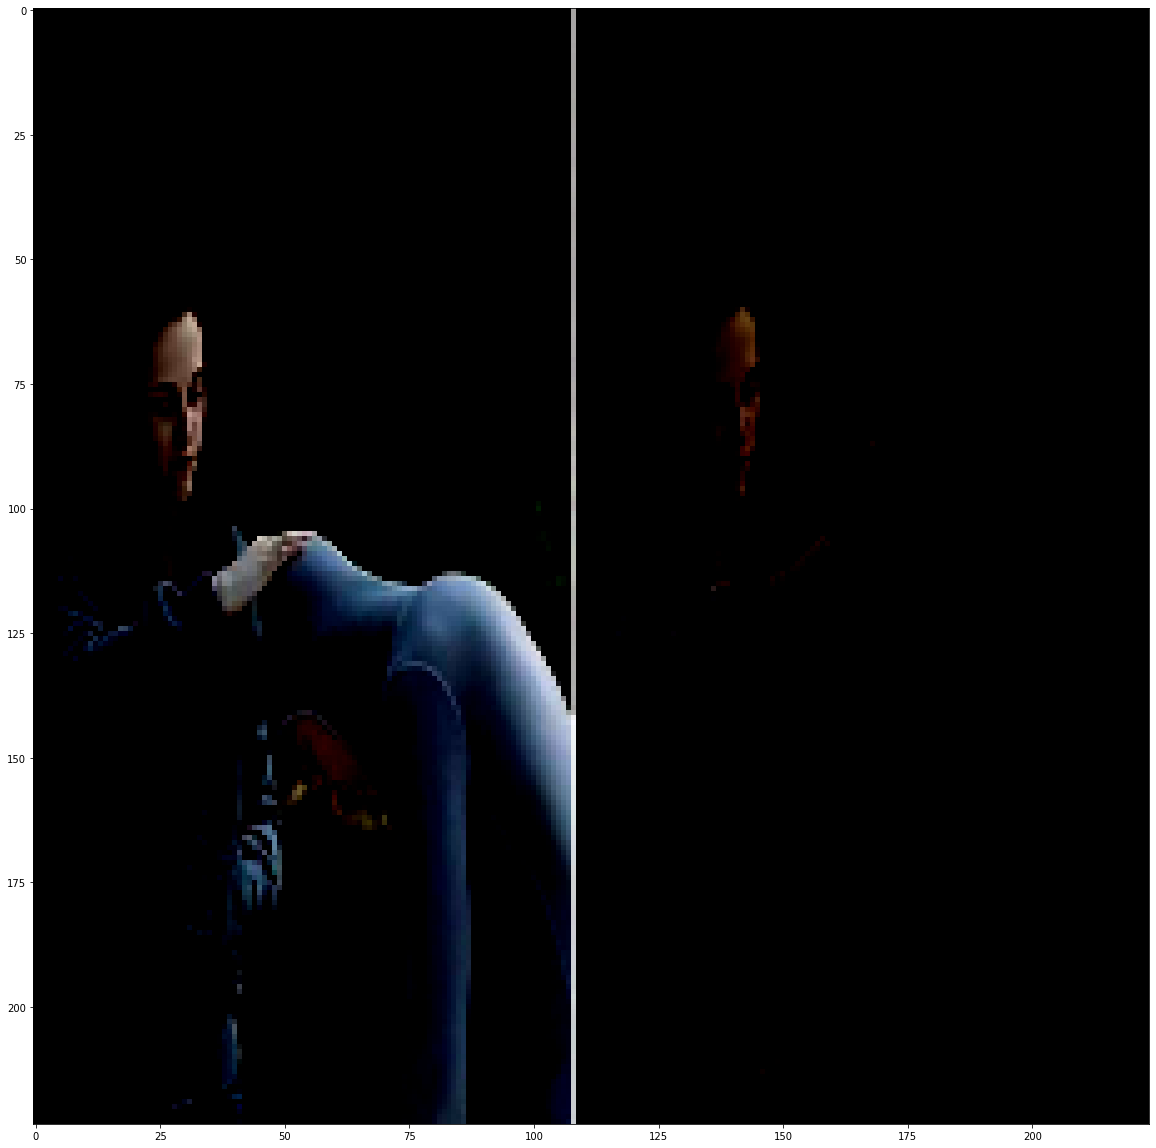

In [16]:
plt.figure(figsize=(20,25))
plt.imshow(X[0])
plt.show()

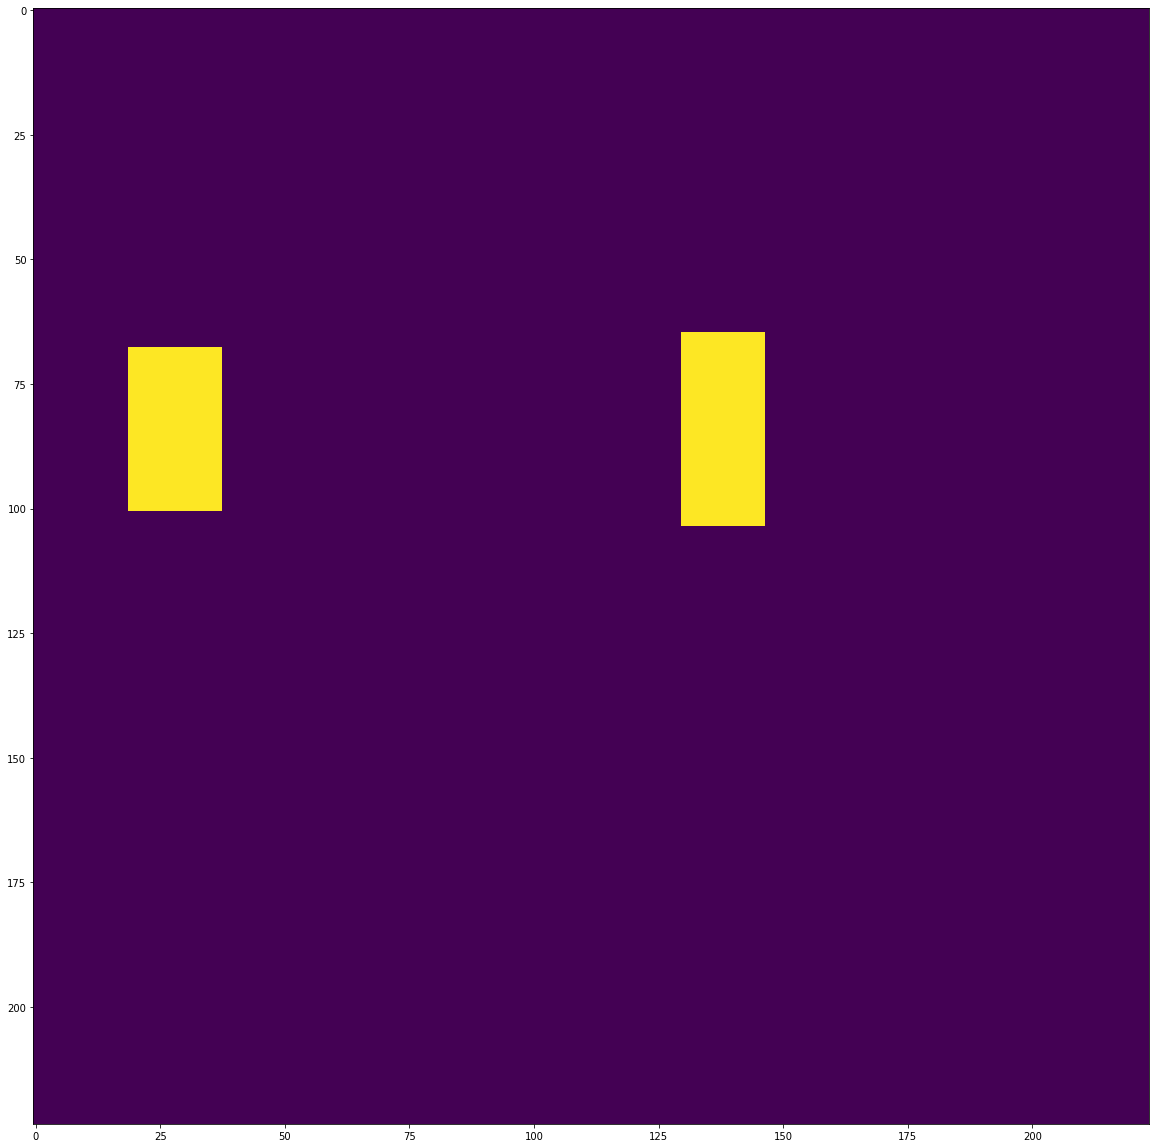

In [15]:
plt.figure(figsize=(20,25))
plt.imshow(masks[0])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


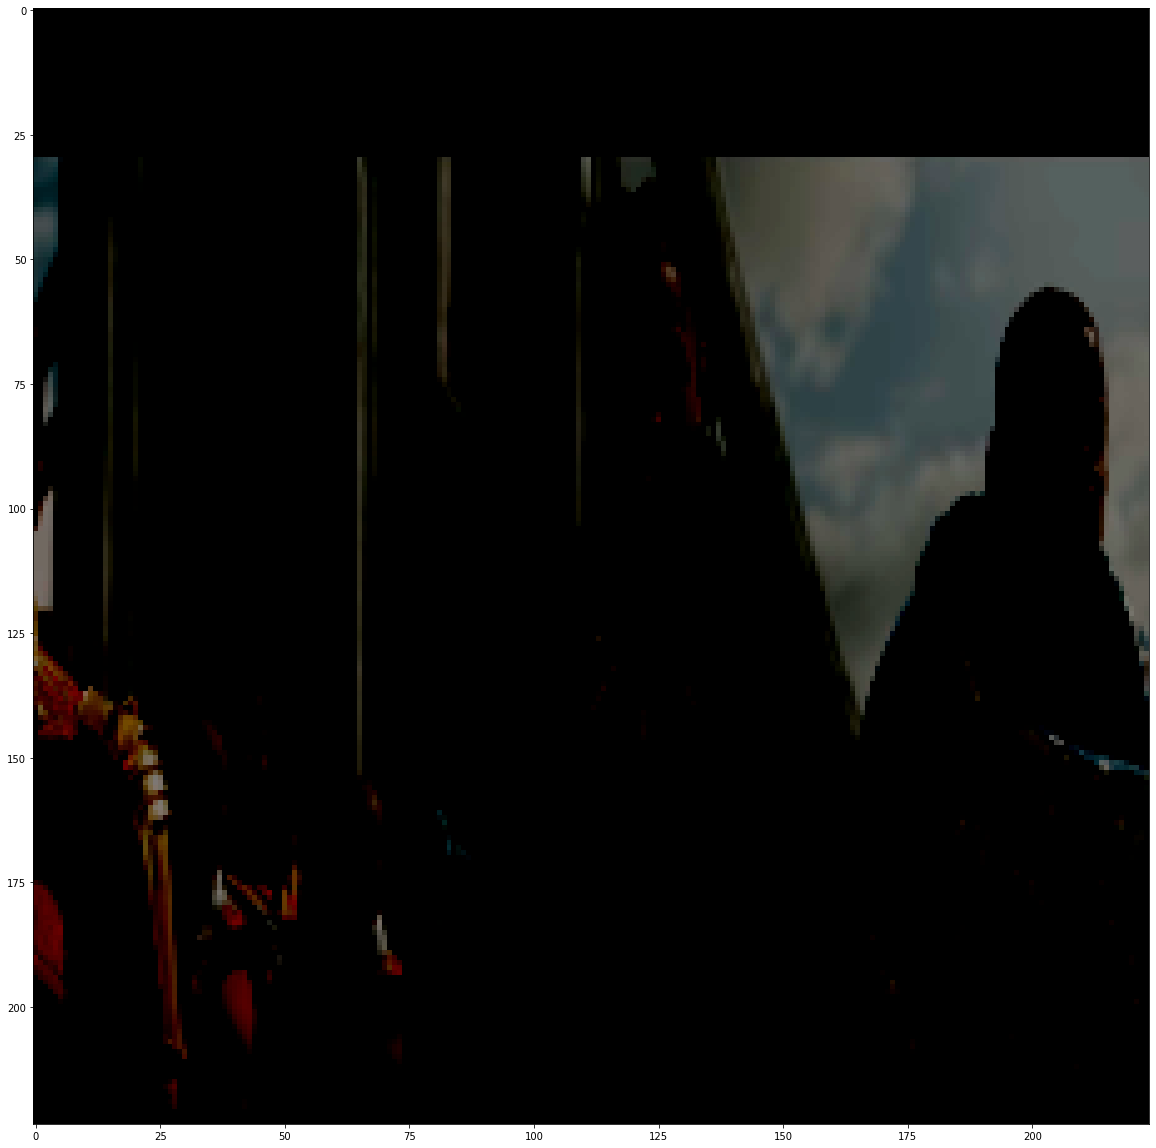

In [18]:
plt.figure(figsize=(20,25))
plt.imshow(X[3])
plt.show()

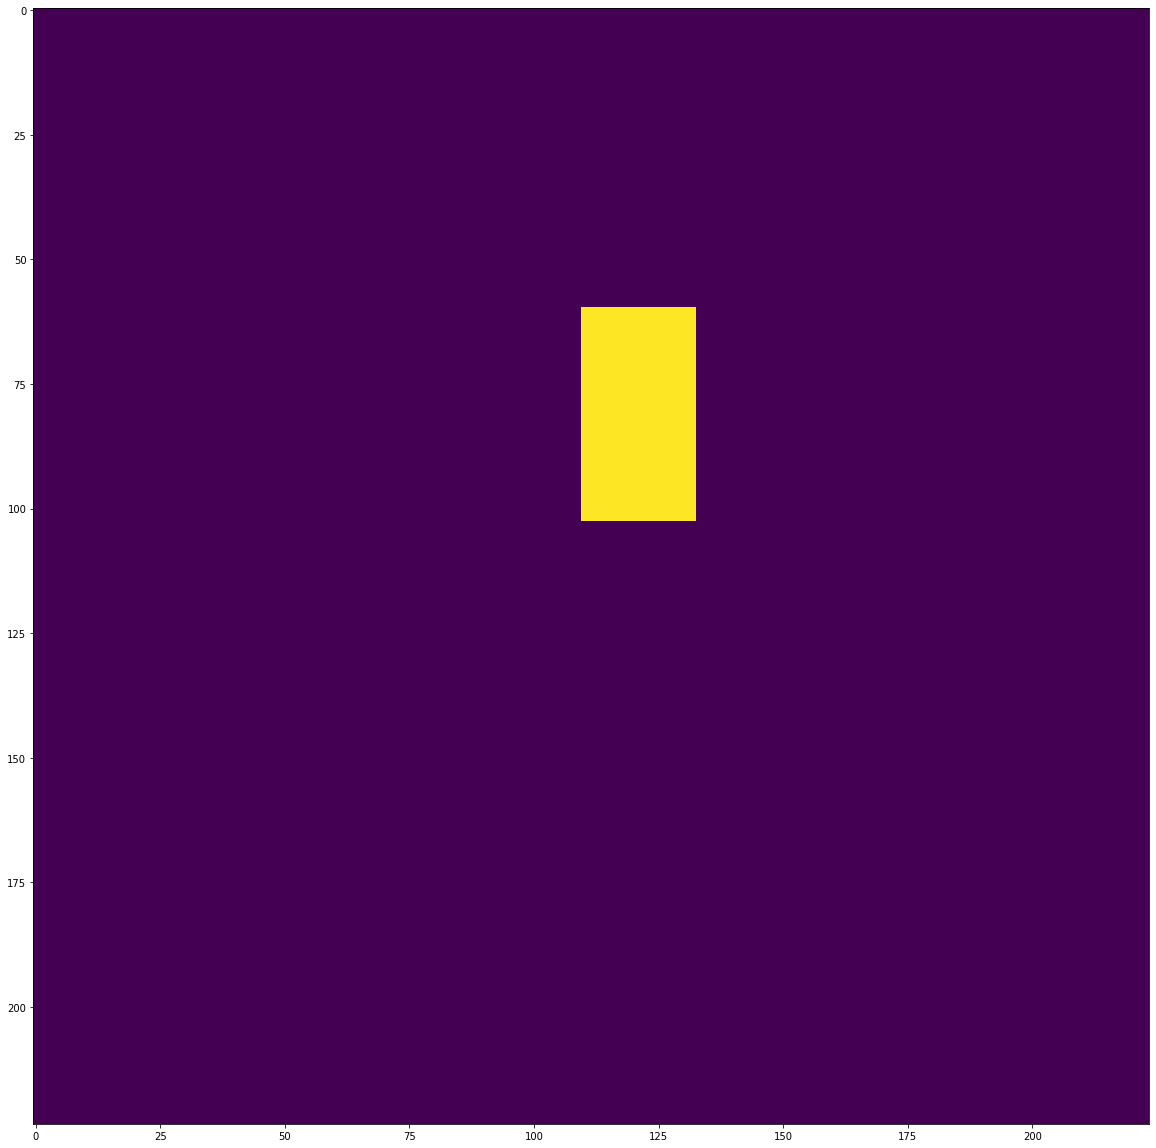

In [19]:
plt.figure(figsize=(20,25))
plt.imshow(masks[3])
plt.show()

In [20]:
X_train = X[:400]
y_train = masks[:400]

In [21]:
X_test = X[400:]
y_test = masks[400:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image array: [[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.9

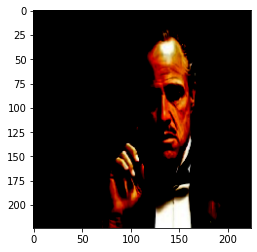

In [22]:
n = 10    
print("Image array:", X_train[n])
plt.imshow(X_train[n])

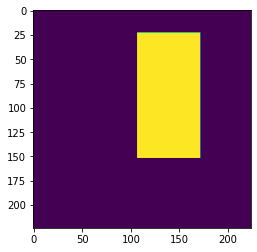

In [23]:
plt.imshow(masks[n])

In [28]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(img_height, img_width, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((img_height, img_width))(x)
    print(x.shape)

    return Model(inputs=model.input, outputs=x)

In [29]:
model = create_model()

17227776/17225924 [==============================] - 0s 0us/step
(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)


In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

In [31]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

In [32]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [33]:
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [35]:
model.fit(X_train, y_train, epochs=10, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/10
400/400 [==============================] - 471s 1s/step - loss: 1.1731 - dice_coefficient: 0.5129

Epoch 00001: loss improved from inf to 1.17313, saving model to model-1.17.h5
Epoch 2/10
400/400 [==============================] - 462s 1s/step - loss: 0.8065 - dice_coefficient: 0.6143

Epoch 00002: loss improved from 1.17313 to 0.80654, saving model to model-0.81.h5
Epoch 3/10
400/400 [==============================] - 463s 1s/step - loss: 0.6970 - dice_coefficient: 0.6555

Epoch 00003: loss improved from 0.80654 to 0.69696, saving model to model-0.70.h5
Epoch 4/10
400/400 [==============================] - 461s 1s/step - loss: 0.6435 - dice_coefficient: 0.6786

Epoch 00004: loss improved from 0.69696 to 0.64349, saving model to model-0.64.h5
Epoch 5/10
400/400 [==============================] - 464s 1s/step - loss: 0.5822 - dice_coefficient: 0.7014

Epoch 00005: loss improved from 0.64349 to 0.58222, saving model to model-0.58.h5
Epoch 6/10
400/400 [========================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


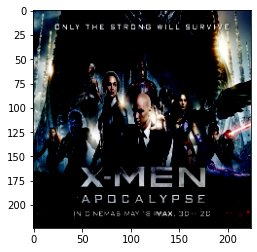

In [42]:
plt.imshow(X_test[8])

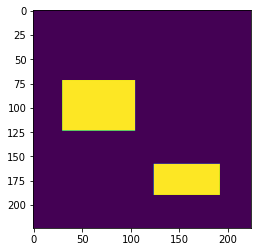

In [44]:
plt.imshow(masks[8])

In [46]:
pred_mask = cv2.resize(1.0 * (model.predict(x=np.array([X_test[8]]))[0] > 0.5), (img_width, img_height)) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


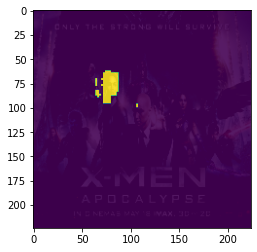

In [47]:
plt.imshow(X_test[8])
plt.imshow(pred_mask, alpha=0.9)